# <center>ASSIGNMENT 2</center>



## Q1.
Dataset: Energy Efficiency Dataset (https://archive.ics.uci.edu/ml/datasets/Energy+efficiency)
The dataset contains 768 samples, each with attributes related to the design of buildings such as wall area, roof area, overall height, glazing area, and orientation. It includes two target variables: the heating load (energy required for heating) and the cooling load (energy required for cooling) of the building. The dataset is relevant for optimizing building energy efficiency and minimizing consumption.
Your objective is to predict the Heating Load of a building based on its physical attributes and architectural design.
(i) Perform data pre-processing steps on the dataset. Handle missing values (if any), explore the correlation between variables, and identify any potential outliers.


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [117]:


df = pd.read_excel("ENB2012_data.xlsx")


df.info()
df.describe()
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB
     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28


In [118]:
df.columns = ['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area', 
              'Overall Height', 'Orientation', 'Glazing Area', 'Glazing Area Distribution', 
              'Heating Load', 'Cooling Load']

df.head()




,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [119]:
print(df.isnull().sum())


Relative Compactness         0
Surface Area                 0
Wall Area                    0
Roof Area                    0
Overall Height               0
Orientation                  0
Glazing Area                 0
Glazing Area Distribution    0
Heating Load                 0
Cooling Load                 0
dtype: int64


                           Relative Compactness  Surface Area     Wall Area  \
Relative Compactness               1.000000e+00 -9.919015e-01 -2.037817e-01   
Surface Area                      -9.919015e-01  1.000000e+00  1.955016e-01   
Wall Area                         -2.037817e-01  1.955016e-01  1.000000e+00   
Roof Area                         -8.688234e-01  8.807195e-01 -2.923165e-01   
Overall Height                     8.277473e-01 -8.581477e-01  2.809757e-01   
Orientation                        4.678592e-17 -3.459372e-17 -2.429499e-17   
Glazing Area                      -2.960552e-15  3.636925e-15 -8.567455e-17   
Glazing Area Distribution         -7.107006e-16  2.438409e-15  2.067384e-16   
Heating Load                       6.222719e-01 -6.581199e-01  4.556714e-01   
Cooling Load                       6.343391e-01 -6.729989e-01  4.271170e-01   

                              Roof Area  Overall Height   Orientation  \
Relative Compactness      -8.688234e-01    8.277473e-01  

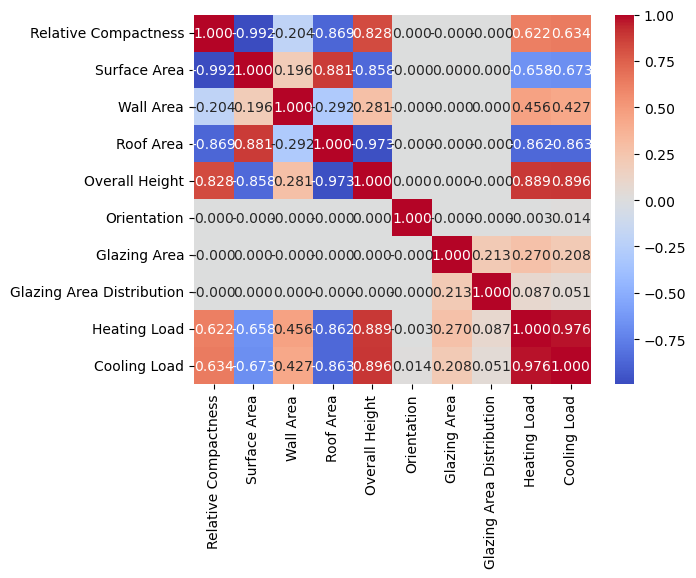

In [120]:
corelation = df[df.columns].corr()
print(corelation)
sns.heatmap(corelation, annot=True, cmap='coolwarm', fmt=".3f")

plt.show()



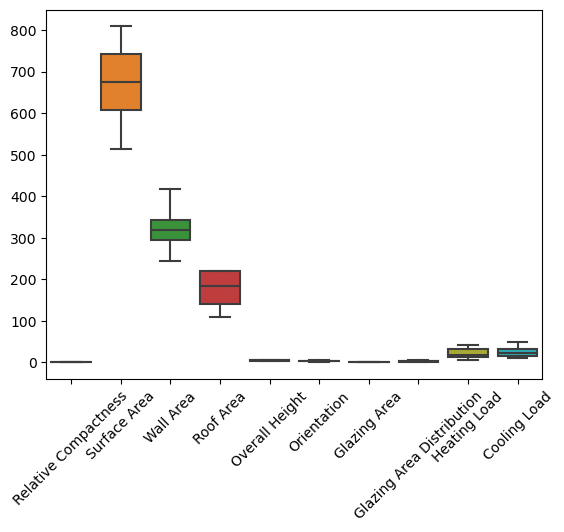

In [122]:

sns.boxplot(df)
plt.xticks(rotation=45)
plt.show()


In [123]:

mean = df['Heating Load'].mean()
std_dev = df["Heating Load"].std()
print("Mean :", mean , "\nStd :", std_dev)
upperLimit = mean + 3*std_dev
lowerLimit = mean - 3*std_dev

df[(df["Heating Load"]<lowerLimit) | (df["Heating Load"]>upperLimit)]

Mean : 22.3071953125 
Std : 10.090203970187025


,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load


We can observe that there are no outliers

(ii) Split the dataset into an 80:20 ratio for training and testing using the sklearn library.


In [124]:
from sklearn.model_selection import train_test_split

x = df.drop(['Heating Load', 'Orientation', 'Glazing Area Distribution', 'Glazing Area', 'Wall Area'], axis=1)
y = df[['Heating Load']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train

,Relative Compactness,Surface Area,Roof Area,Overall Height,Cooling Load
60,0.82,612.5,147.00,7.0,27.31
618,0.64,784.0,220.50,3.5,22.09
346,0.86,588.0,147.00,7.0,29.90
294,0.90,563.5,122.50,7.0,32.71
231,0.66,759.5,220.50,3.5,14.83
...,...,...,...,...,...
71,0.76,661.5,122.50,7.0,33.67
106,0.86,588.0,147.00,7.0,27.36
270,0.71,710.5,220.50,3.5,14.26
435,0.98,514.5,110.25,7.0,30.12


(iii) Train a multivariate linear regression model from scratch using numpy, pandas, and matplotlib. Additionally, train a linear regression model using the sklearn library on the training dataset. Also train ridge and lasso regression model using the sklearn library on the training dataset


In [125]:
x_train_manual = np.c_[np.ones(x_train.shape[0]), x_train]
x_test_manual = np.c_[np.ones(x_test.shape[0]), x_test]


weights = np.linalg.inv(x_train_manual.T @ x_train_manual) @ x_train_manual.T @ y_train
y_pred_manual = x_test_manual @ weights


In [126]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)


In [127]:
ridge = Ridge(alpha=0.5)
ridge.fit(x_train, y_train)
y_pred_ridge = ridge.predict(x_test)

In [128]:

lasso = Lasso(alpha=0.5)
lasso.fit(x_train, y_train)
y_pred_lasso = lasso.predict(x_test)


(iv) Evaluate the performance for each model on the test dataset using following metrics: R2 score, Mean Squared Error (MSE) and Root Mean Squared Error(RMSE). Compare the performance of the manual model and the sklearn model and plot the predicted vs actual values for both models.

In [129]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred_manual)
r2 = r2_score(y_test, y_pred_manual)
rmse = np.sqrt(mse)
print("Manual Regression :- \n" )
print("MSE : ", mse, "\n")
print("R2 :",  r2, "\n")
print("RMSE : ", rmse, "\n")


mse = mean_squared_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)
rmse = np.sqrt(mse)
print("Linear Regression :- \n" )
print("MSE : ", mse, "\n")
print("R2 :",  r2, "\n")
print("RMSE : ", rmse, "\n")


mse = mean_squared_error(y_test, y_pred_ridge)
r2 = r2_score(y_test, y_pred_ridge)
rmse = np.sqrt(mse)
print("Ridge Regression :- \n" )
print("MSE : ", mse, "\n")
print("R2 :",  r2, "\n")
print("RMSE : ", rmse, "\n")


mse = mean_squared_error(y_test, y_pred_lasso)
r2 = r2_score(y_test, y_pred_lasso)
rmse = np.sqrt(mse)
print("Lasso Regression :- \n" )
print("MSE : ", mse, "\n")
print("R2 :",  r2, "\n")
print("RMSE : ", rmse, "\n")



Manual Regression :- 

MSE :  4.822775416787821 

R2 : 0.9537305579903899 

RMSE :  2.1960818328987246 

Linear Regression :- 

MSE :  4.822775416796654 

R2 : 0.953730557990305 

RMSE :  2.1960818329007354 

Ridge Regression :- 

MSE :  4.822498051007465 

R2 : 0.9537332190224265 

RMSE :  2.1960186818439102 

Lasso Regression :- 

MSE :  4.785426684922209 

R2 : 0.9540888796690591 

RMSE :  2.1875618128231733 



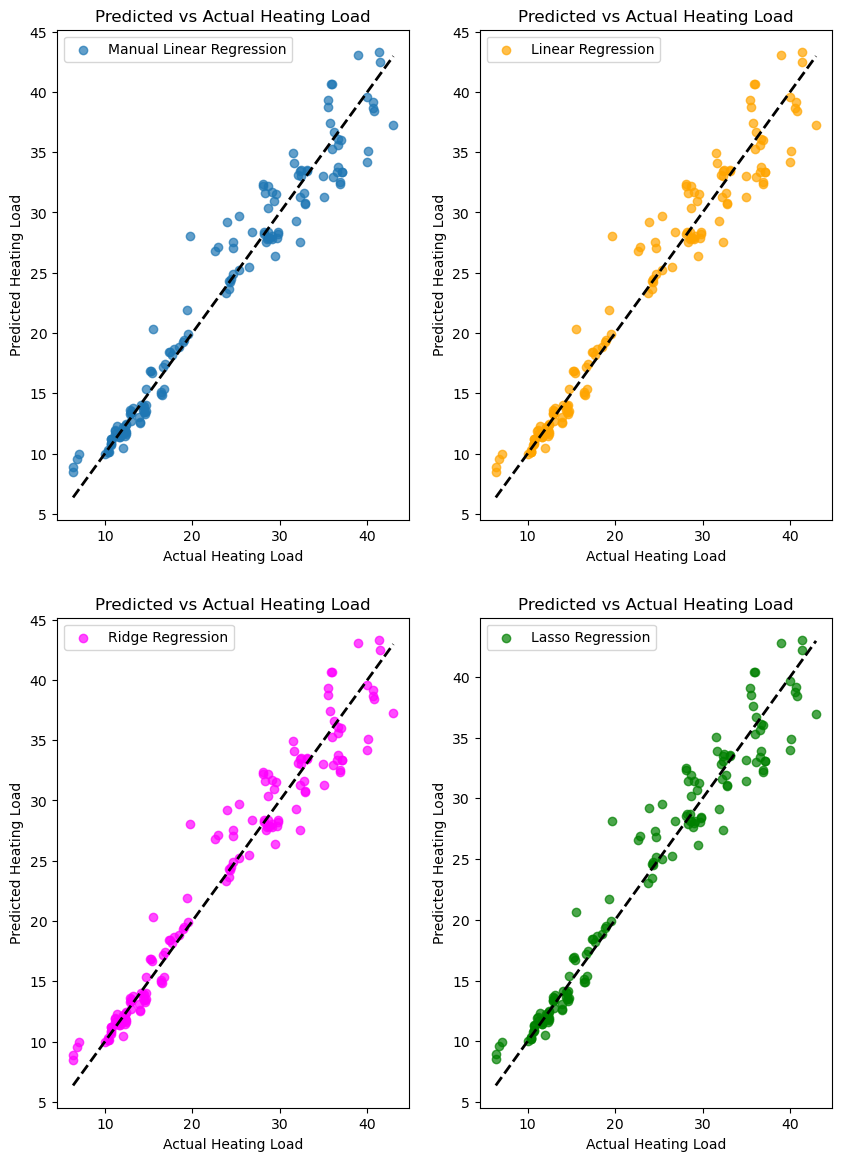

In [130]:
plt.figure(figsize=(10, 14))
plt.subplot(2, 2, 1)
plt.scatter(y_test, y_pred_manual, label="Manual Linear Regression", alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Heating Load")
plt.ylabel("Predicted Heating Load")
plt.legend()
plt.title("Predicted vs Actual Heating Load")

plt.subplot(2,2,2)
plt.scatter(y_test, y_pred_lr, label="Linear Regression", alpha=0.7, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Heating Load")
plt.ylabel("Predicted Heating Load")
plt.legend()
plt.title("Predicted vs Actual Heating Load")


plt.subplot(2,2,3)
plt.scatter(y_test, y_pred_ridge, label="Ridge Regression", alpha=0.7, color='magenta')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Heating Load")
plt.ylabel("Predicted Heating Load")
plt.legend()
plt.title("Predicted vs Actual Heating Load")

plt.subplot(2,2,4)
plt.scatter(y_test, y_pred_lasso, label="Lasso Regression", alpha=0.7, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Heating Load")
plt.ylabel("Predicted Heating Load")
plt.legend()
plt.title("Predicted vs Actual Heating Load")
plt.show()

(v) Propose energy efficiency improvement suggestions based on the insights from the model results, focusing on building design elements that most significantly impact heating load.

Factors such as wall area, roof area, window area, and total building height greatly affect the heating load of a building. Heat loss generally increases with large wall and roof areas. This creates the necessity to look for appropriate insulation materials with very high R-values to avoid energy losses. This optimization of the glazing area and its distribution is necessary to reach a balance between natural light availability and thermal insulation. However, double-glazed or triple-glazed windows basically help reduce the amount of heat transferred while keeping indoor comfort. Besides, compact building designs that minimize the external surface area relative to the volume of the building can be effectively employed to reduce the need for heating. Orientation of the building also plays a key role—south-facing windows in colder climates can harvest passive solar heating, thus reducing dependence on artificial heating. All these measures act together to improve energy efficiency and curtail heating loads, thus paving the way towards a more sustainable building design. 